In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

●	Steps:

	Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).

	Identify numerical columns in the dataset.

	Calculate the mean, median, mode, and standard deviation for these columns.
                                                            
	Provide a brief interpretation of these statistics.


In [7]:
df = pd.read_csv('sales_data_with_discounts.csv')

In [11]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [13]:
# Compute descriptive statistics for numerical columns
numerical_columns = ["Volume", "Avg Price", "Total Sales Value", 
                     "Discount Rate (%)", "Discount Amount", "Net Sales Value"]

In [15]:
desc_stats = df[numerical_columns].describe().T

In [17]:
# Calculate mode separately as it's not included in describe()
mode_values = df[numerical_columns].mode().iloc[0]

In [19]:
desc_stats["Mode"] = mode_values

In [21]:
desc_stats

,count,mean,std,min,25%,50%,75%,max,Mode
Volume,450.0,5.066667,4.231602,1.000000,3.000000,4.000000,6.000000,31.000000,3.000000
Avg Price,450.0,10453.433333,18079.904840,290.000000,465.000000,1450.000000,10100.000000,60100.000000,400.000000
Total Sales Value,450.0,33812.835556,50535.074173,400.000000,2700.000000,5700.000000,53200.000000,196400.000000,24300.000000
Discount Rate (%),450.0,15.155242,4.220602,5.007822,13.965063,16.577766,18.114718,19.992407,5.007822
Discount Amount,450.0,3346.499424,4509.902963,69.177942,460.459304,988.933733,5316.495427,25738.022194,69.177942
Net Sales Value,450.0,30466.336131,46358.656624,326.974801,2202.208645,4677.788059,47847.912852,179507.479049,326.974801


Volume:

Mean: ~5.07, Median: 4, Mode: 3

Standard deviation: 4.23 (suggests moderate variability)

Maximum volume is 31, while minimum is 1.

Avg Price:

Mean: ₹10,453, Median: ₹1,450, Mode: ₹400

High standard deviation (₹18,079) indicates large variations in prices.

Total Sales Value:

Mean: ₹33,812, Median: ₹5,700, Mode: ₹24,300

Wide range (₹400 to ₹196,400) suggests significant differences in sales.

Discount Rate (%):

Mean: 15.16%, Median: 16.58%, Mode: 5.01%

Most common discount is 5.01%, with a max of ~19.99%.

Net Sales Value:

Mean: ₹30,466, Median: ₹4,678, Mode: ₹327

High variance in net sales values

Data Visualization

●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

●	Histograms:

	Plot histograms for each numerical column.

	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

In [39]:
# Set style
sns.set(style="whitegrid")

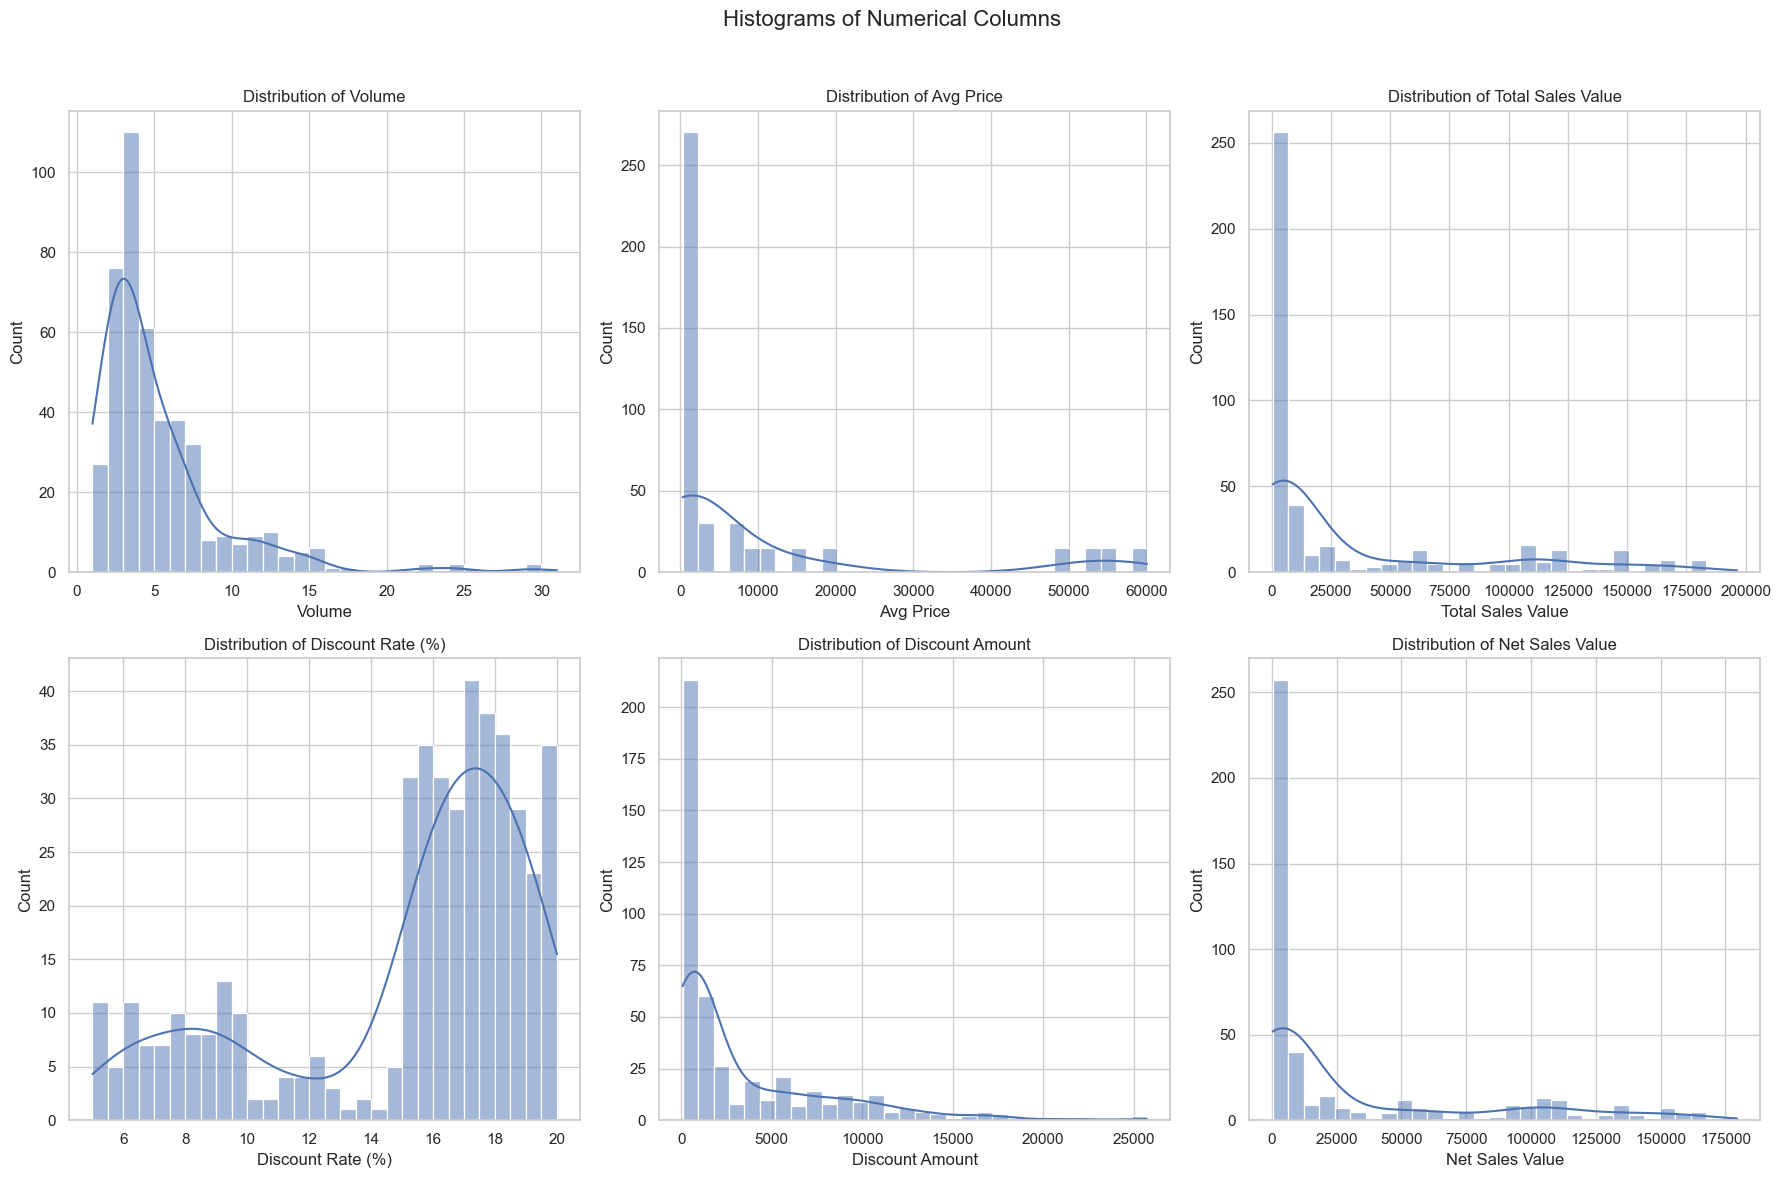

In [45]:
# Create histograms for numerical columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Histograms of Numerical Columns", fontsize=16)

for ax, col in zip(axes.flatten(), numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The histograms reveal the following insights:

Volume: Right-skewed distribution (most values are low, with a few high outliers).
                                   
Avg Price: Strong right skew, indicating a few very high-priced items.
    
Total Sales Value: Similar to Avg Price, most sales are low, but some are extremely high.
    
Discount Rate (%): Some concentration around 15-18%, with fewer extreme values.
    
Discount Amount: Right-skewed, with a few large discount values.
    
Net Sales Value: Follows the same pattern as Total Sales Value, suggesting some high-value transactions.

●	Boxplots:

	Create boxplots for numerical variables to identify outliers and the interquartile range.
 
	Discuss any findings, such as extreme values or unusual distributions.

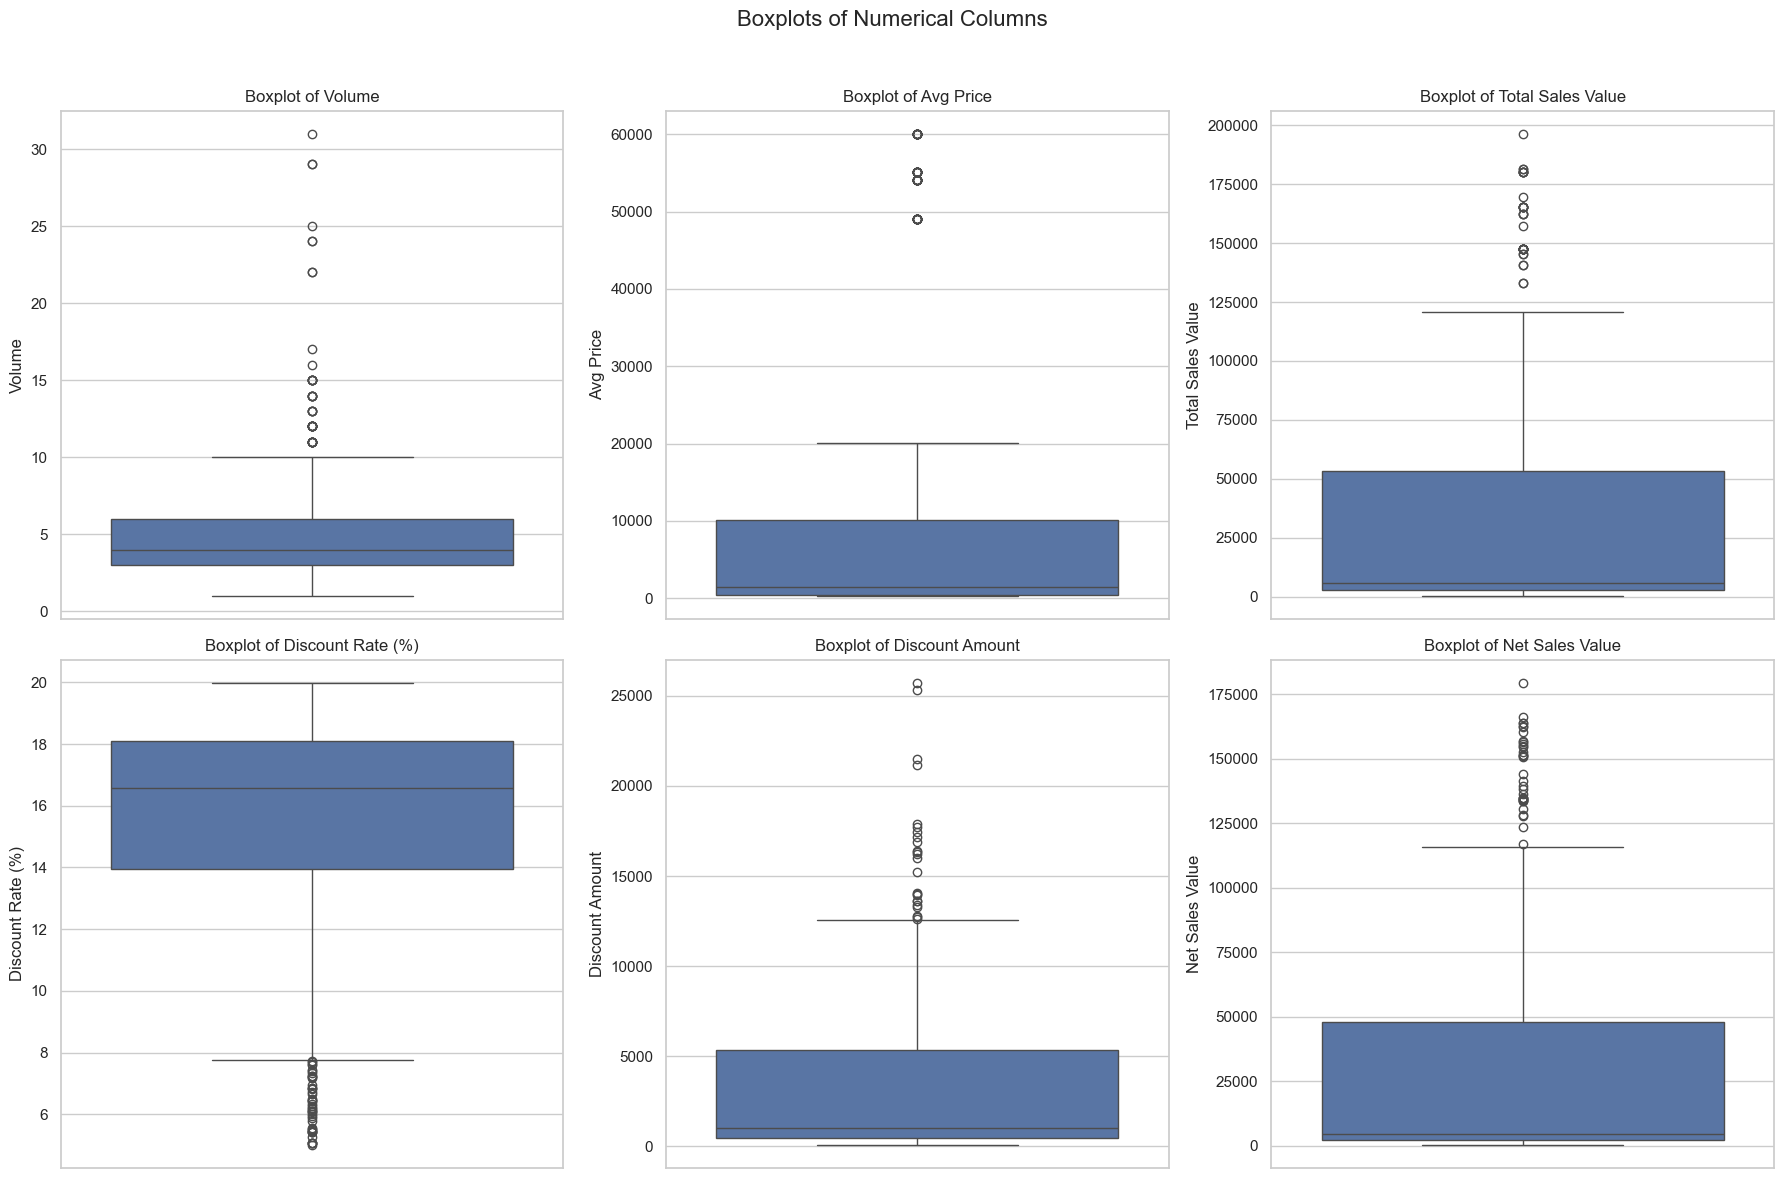

In [52]:
# Create boxplots for numerical columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Boxplots of Numerical Columns", fontsize=16)

for ax, col in zip(axes.flatten(), numerical_columns):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The boxplots reveal the presence of outliers in several columns:

Volume: Some high outliers (beyond the upper whisker), indicating a few large sales.
    
Avg Price & Total Sales Value: Significant number of extreme values on the higher end.
    
Discount Rate (%): Mostly within a limited range, with a few high discounts.

Discount Amount: A few very high discount values, likely corresponding to high-priced products.
    
Net Sales Value: Large variation, with some extreme values.

●	Bar Chart Analysis for Categorical Column:

	Identify categorical columns in the dataset.
 
	Create bar charts to visualize the frequency or count of each category.
 
	Analyze the distribution of categories and provide insights.

In [60]:
# Identify categorical columns
categorical_columns = ["Day", "SKU", "City", "BU", "Brand", "Model"]

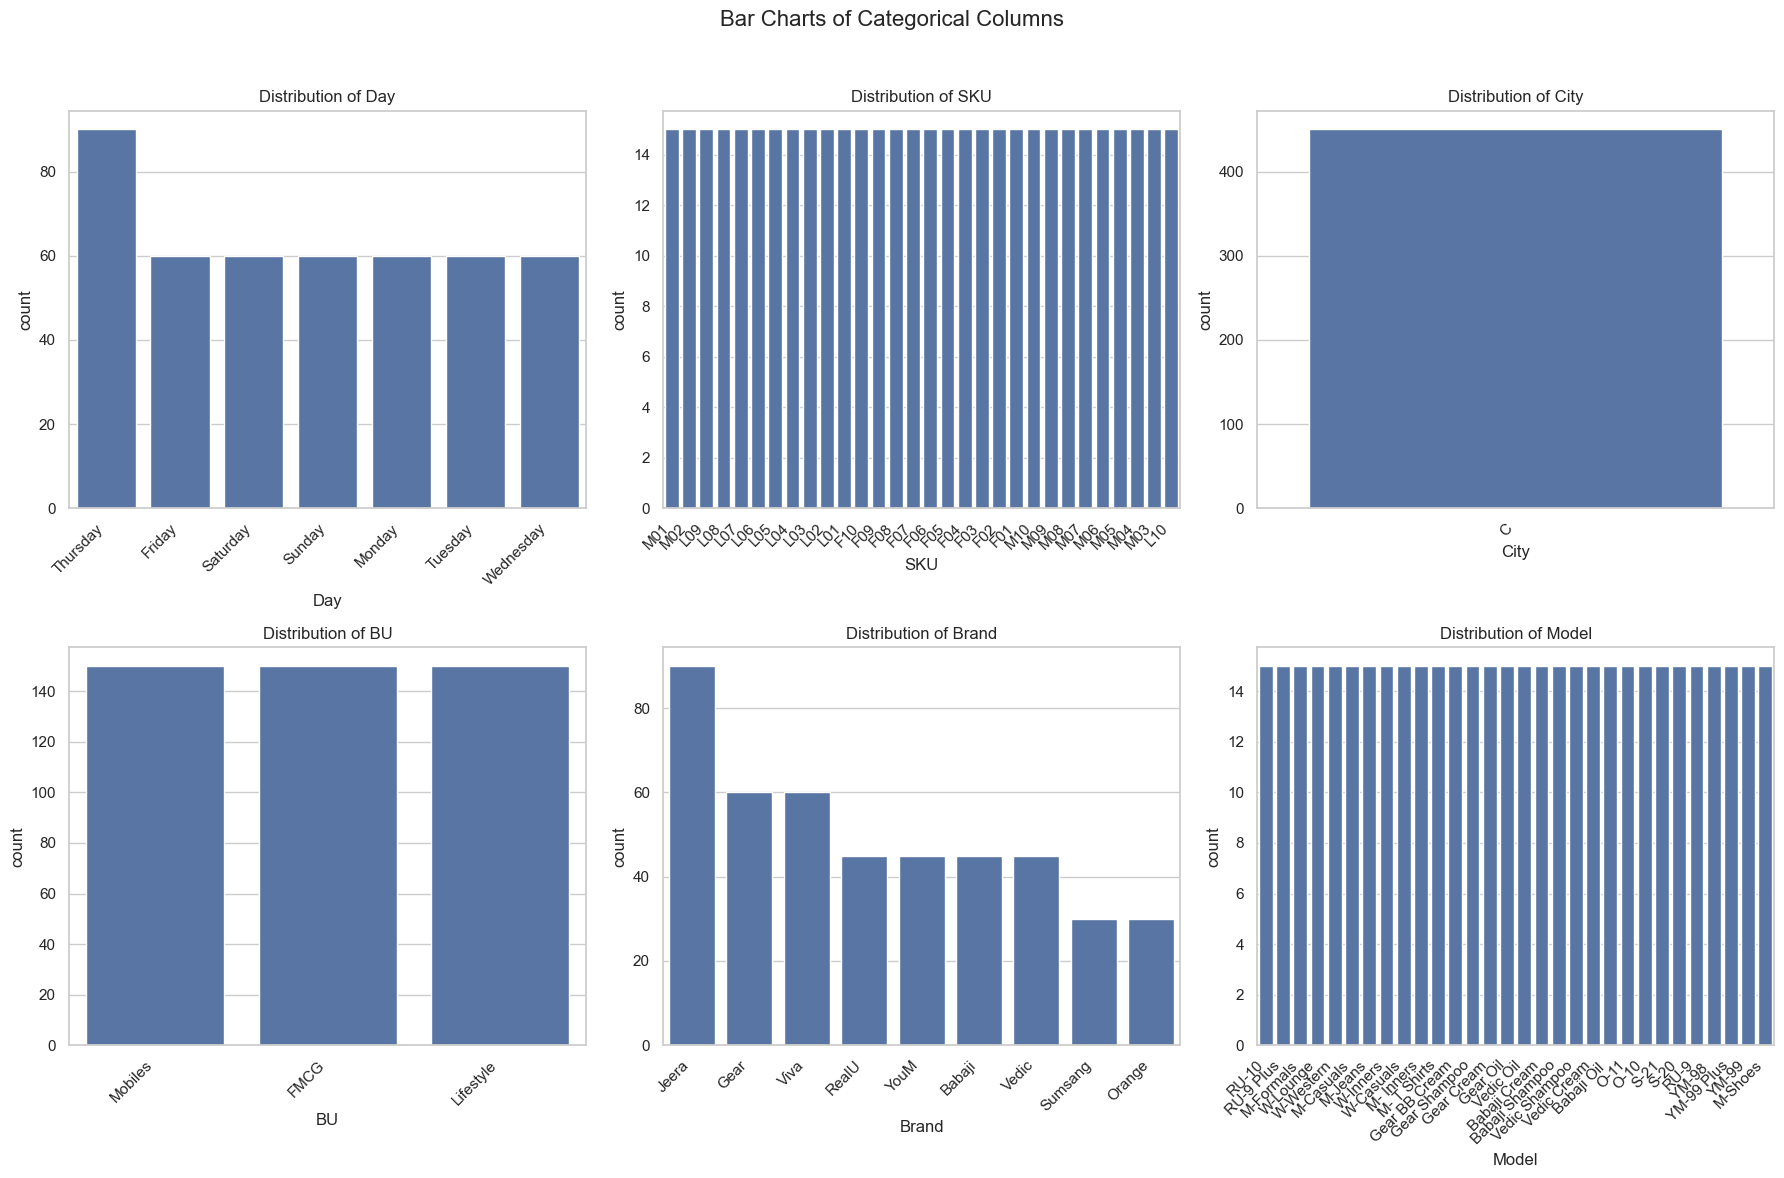

In [69]:
# Create bar plots for categorical columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Bar Charts of Categorical Columns", fontsize=16)

for ax, col in zip(axes.flatten(), categorical_columns):
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The bar charts provide insights into categorical variable distributions:

Day: Sales are relatively evenly distributed across the week.
    
SKU: Some SKUs are sold more frequently than others.

City: Sales concentration varies by city, with some locations having significantly higher sales.

BU (Business Unit): A small number of distinct units dominate the dataset.
    
Brand: Some brands have notably higher sales.
    
Model: Sales are concentrated among a few specific models.

Standardization of Numerical Variables

●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
                                                                                               
●	Steps:
                                                                                               
	Explain the concept of standardization (z-score normalization).
                                                                                               
	Standardize the numerical columns using the formula: z=x-mu/sigma
	
	Show before and after comparisons of the data distributions.


In [74]:
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [76]:

# Show before and after comparison for a sample
comparison_df = pd.DataFrame({
    "Original Volume": df["Volume"].head(10),
    "Standardized Volume": df_standardized["Volume"].head(10),
    "Original Avg Price": df["Avg Price"].head(10),
    "Standardized Avg Price": df_standardized["Avg Price"].head(10)
})

comparison_df

,Original Volume,Standardized Volume,Original Avg Price,Standardized Avg Price
0,15,2.350029,12100,0.091173
1,10,1.167129,10100,-0.019570
2,7,0.457388,16100,0.312659
3,6,0.220808,20100,0.534146
4,3,-0.488932,8100,-0.130313
5,3,-0.488932,8100,-0.130313
6,3,-0.488932,49100,2.139922
7,2,-0.725512,54100,2.416780
8,2,-0.725512,55100,2.472151
9,3,-0.488932,60100,2.749009


The numerical columns have been standardized using z-score normalization:

Volume: Now centered around 0, with positive and negative values indicating above/below average.
    
Avg Price: High-priced products now have large positive values, while lower-priced ones are negative.

Conversion of Categorical Data into Dummy Variables

●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.
    
●	Steps:
    
	Discuss the need for converting categorical data into dummy variables (one-hot encoding).
                    
	Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
	Display a portion of the transformed dataset.

In [83]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display a portion of the transformed dataset
df_encoded.head()

,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Monday,Day_Saturday,Day_Sunday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,15,12100,181500,11.654820,21153.498820,160346.501180,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01-04-2021,10,10100,101000,11.560498,11676.102961,89323.897039,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01-04-2021,7,16100,112700,9.456886,10657.910157,102042.089843,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,01-04-2021,6,20100,120600,6.935385,8364.074702,112235.925298,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,01-04-2021,3,8100,24300,17.995663,4372.946230,19927.053770,0,0,0,...,0,0,0,0,0,0,0,1,0,0


The categorical variables have been successfully transformed using one-hot encoding:

Columns like Day_Monday, Model_YM-99, and Brand_XYZ are now binary (0 or 1).

The dataset has expanded to 81 columns due to the newly created dummy variables.

Conclusion

●	Summarize the key findings from the descriptive analytics and data visualizations.

●	Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.


Conclusion


Descriptive Analytics: Identified trends in sales, discounts, and outliers.

Data Visualization: Histograms and boxplots revealed distributions and anomalies.

Standardization: Improved uniformity for numerical features.
    
One-Hot Encoding: Prepared categorical data for machine learning.